In [1]:
import numpy as np
import pandas as pd
from scipy import stats

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D 

In [2]:
np.random.seed(17)

## Pregunta 1

In [3]:
def random_point(dim):
    return np.array([np.random.rand() for _ in range(dim)])

In [4]:
points_two_dimension = []

for i in range(400):
    points_two_dimension.append(random_point(2))

xs = []
ys = []
for i in points_two_dimension:
    xs.append(i[0])
    ys.append(i[1])

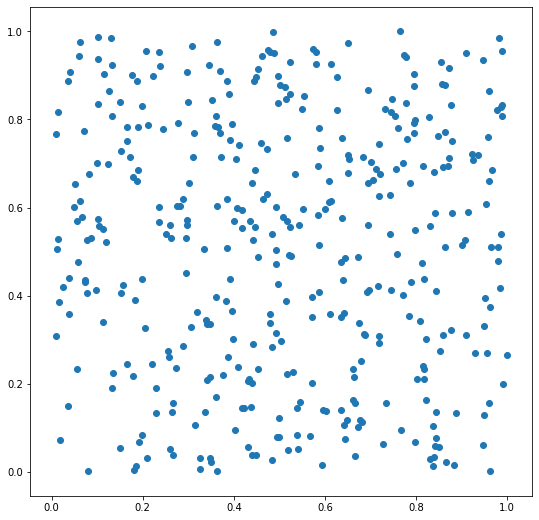

In [5]:
fig = plt.figure(figsize=(9,9))
plt.scatter(xs,ys)

### Agregamos ruido

In [6]:
clases = [-1,1]

values = np.random.choice(clases,400,p=[0.2,0.8])

In [7]:
values[values==-1].sum()

-85

In [8]:
data = list(zip(xs,ys,values))

In [9]:
df = pd.DataFrame(data,columns=['xs','ys','c'])
df.iloc[15:20]

,xs,ys,c
15,0.198774,0.831364,1
16,0.567991,0.082340,1
17,0.544999,0.158959,1
18,0.676762,0.118472,1
19,0.444996,0.887982,1


In [10]:
X = df.iloc[:, :2].values 
y = df.iloc[:,2:].values
y = np.array(y).flatten()

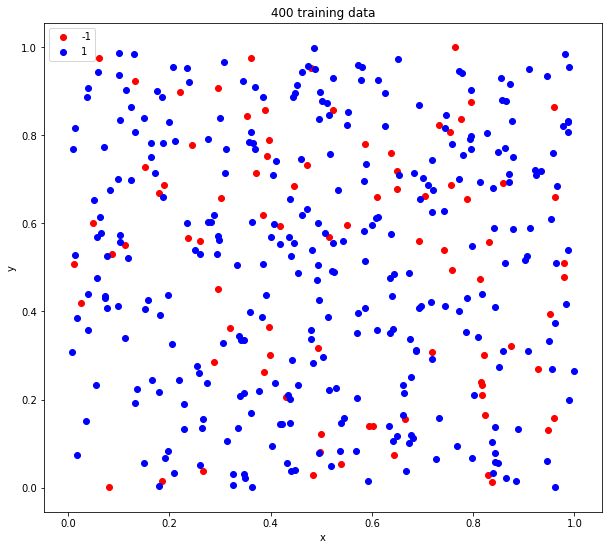

In [11]:
colors = ['red','blue']
names = ['-1', '1']

fig = plt.figure(figsize=(10,9))

for color, i, target in zip(colors, [-1, 1], names):
    plt.scatter(X[y==i, 0], X[y==i, 1], color=color, label=target)

plt.xlabel("x")
plt.ylabel("y")
plt.title("400 training data")
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.show()
        

### Comparando algoritmos de clasificación

In [12]:
from sklearn.neighbors import KNeighborsClassifier # knn

from sklearn.ensemble import RandomForestClassifier # rf

from sklearn.ensemble import AdaBoostClassifier # adaboost & ...
from sklearn.tree import DecisionTreeClassifier # ... learner

In [13]:
# Fit algorithms

In [14]:
k = 1
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X,y)

rf = RandomForestClassifier(n_estimators=500, random_state=17)
rf.fit(X,y)

ada = AdaBoostClassifier(DecisionTreeClassifier(max_depth=8),n_estimators=100, random_state=17)
ada.fit(X,y)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=8,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=None,
                             

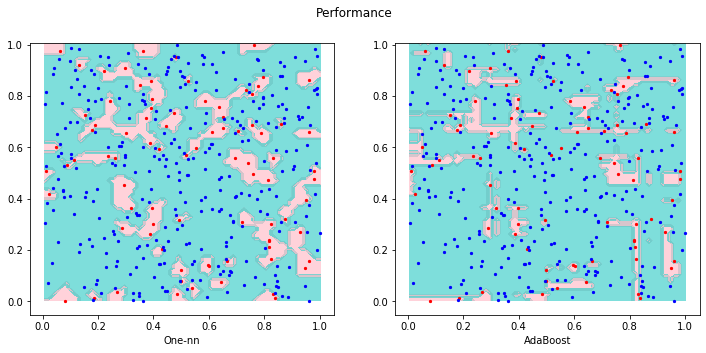

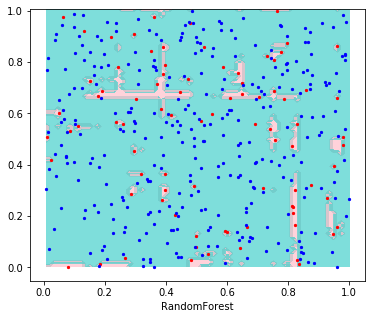

In [15]:
x_min, x_max = X[:,0].min() - 0.001, X[:,0].max() + 0.01 
y_min, y_max = X[:,1].min() - 0.001, X[:,1].max() + 0.01

h = (x_max/x_min)/10000

xx,yy = np.meshgrid(np.arange(x_min, x_max, h), 
                    np.arange(y_min, y_max, h))

# 1-nn
Z_knn = knn.predict(np.c_[xx.ravel(), yy.ravel()]) 
Z_knn = Z_knn.reshape(xx.shape)

# RandomForest
Z_rf = rf.predict(np.c_[xx.ravel(), yy.ravel()]) 
Z_rf = Z_rf.reshape(xx.shape)

# Adaboost
Z_ada = ada.predict(np.c_[xx.ravel(), yy.ravel()]) 
Z_ada = Z_ada.reshape(xx.shape)

zs = [Z_knn,Z_ada]
names = ['One-nn','AdaBoost']


fig,ax = plt.subplots(1,2,figsize=(12,5))
fig.suptitle('Performance')

for i in range(2):
    ax[i].contourf(xx,yy,zs[i], alpha=0.7,colors=['pink','mediumturquoise'])
    ax[i].set_xlabel(names[i])
    for color, p, target in zip(colors, [-1, 1], names):
        ax[i].scatter(X[y==p, 0], X[y==p, 1], color=color, label=target,s = 5)
            

fig_2,ax_2 = plt.subplots(figsize=(6,5))
ax_2.contourf(xx,yy,Z_rf,alpha=0.7,colors=['pink','mediumturquoise'])
ax_2.set_xlabel('RandomForest')
for color, p, target in zip(colors, [-1, 1], names):
        ax_2.scatter(X[y==p, 0], X[y==p, 1], color=color, label=target,s = 5)

plt.show()

In [16]:
# Region's Classifications

print('One-nn: '+str(100-abs(Z_knn[Z_knn==-1].sum()/len(Z_knn)))+'%')
print('RandomForest: '+str(100-abs(Z_rf[Z_rf==-1].sum()/len(Z_rf)))+'%')
print('AdaBoost: '+str(100-abs(Z_ada[Z_ada==-1].sum()/len(Z_ada)))+'%')

One-nn: 83.42307692307692%
RandomForest: 94.43589743589743%
AdaBoost: 89.2051282051282%


### Comentarios/Conclusiones de la imagen

A lo largo de las 3 imagenes se compartira lo mismo en cuanto al color:
   * Color turquesa para valor +1
   * Color rosa para valor -1


Dado que la regla de Bayes (https://en.wikipedia.org/wiki/Naive_Bayes_classifier) sería clasificar cada punto como +1, en el paper se juzgo el rendimiento de los clasificadores por la fracción del cuadrado de la unidad que coincide con la regla de Bayes. Es por esta razón que me he dado la molestía de calcular el valor real que ocupa la clasificación de 1 en toda la imagen (en porcentaje). Esto lo realizé extrayendo el porcentaje de los puntos (después de realizar el mallado) los cuales son -1, luego dar con el porcentaje dividendo por el valor de los puntos totales asi extraemos el porcentaje del valor en rosa (-1) de toda la imagen, el complemento es el valor en turques (+1).

*Importante:*: En nuestro caso las probabilidades, p(Y=1|X) = 0.8 nos dieron 85 puntos '-1', en el paper original se tiene 80 puntos '-1'.

Se observa como en el algoritmo por el vecino más proximo (One-nn) se tiene un porcentaje del valor +1 de $\approx$ 83% el cual esta cerca del valor dado por el paper de 79%, y del valor esperado en promedio para el One-nn de 80%).

Para el algoritmo AdaBoost, este valor aumenta un poco el cual es 89% ( de nuevo se recuerda que en el paper original se tiene un valor de 87% ) despues de 100 iteraciones (el cual es un valor alto).

Por último para el algoritmo RandomForest (con 500 árboles) tenemos un valor de $\approx$ 94%. Con esto llegando a la conclusión que al aparecer ruido (valores -1) tanto el algoritmo RandomForest como el algoritmo AdaBoost son menos sensible a estos puntos de ruido, caractéristica que lamentablemente no es compartida con el algoritmo One-nn lo cual desnuda la dificultad de éste algoritmo al ruido. Visualmente podemos también notar esto, ya que las regiones de rosado son más visibles en One-nn que en sus dos contrincantes: AdaBoost y RandomForest.

## Pregunta 2

In [17]:
# New X and y
x_infe = 0.62 #0.70
x_sup = 0.78 # 0.88

y_infe = 0.62 #0.40
y_sup = 0.78 #0.60

X_cut = X[(X[:,0]>x_infe) & (X[:,0]<x_sup) & (X[:,1]>y_infe) & (X[:,1]<y_sup)]
y_cut = y[(X[:,0]>x_infe) & (X[:,0]<x_sup) & (X[:,1]>y_infe) & (X[:,1]<y_sup)]

In [18]:
rf = RandomForestClassifier(n_estimators=500,random_state=17)
rf = rf.fit(X,y)

In [19]:
rf.estimators_[:6]

[DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                        max_features='auto', max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort=False,
                        random_state=1265576559, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                        max_features='auto', max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort=False,
                        random_state=780729585, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                        max_features='auto', max_leaf_nodes=None,
                  

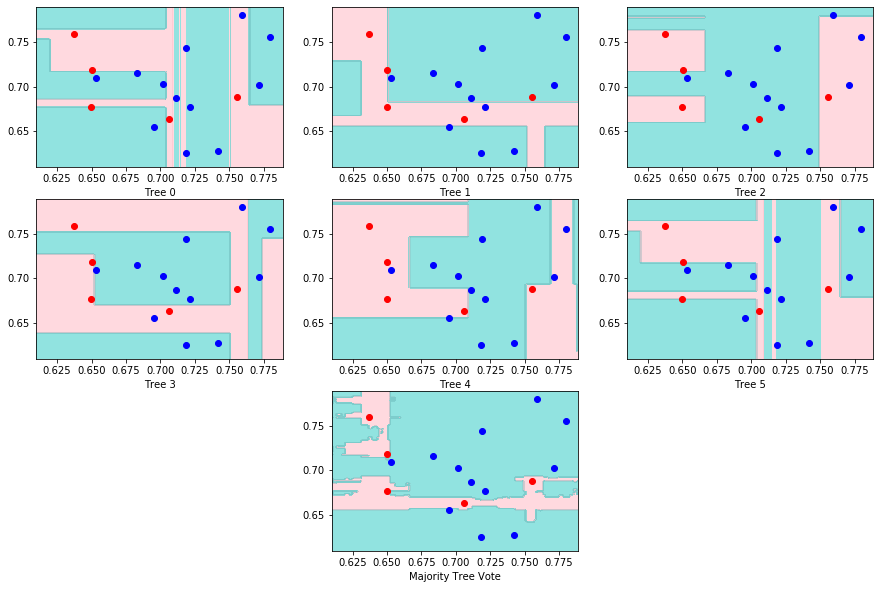

In [20]:
x_min, x_max = x_infe - 0.01, x_sup + 0.01 
y_min, y_max = y_infe - 0.01, y_sup + 0.01

h = (x_max/x_min)/1000

xx,yy = np.meshgrid(np.arange(x_min, x_max, h), 
                    np.arange(y_min, y_max, h))


zs = []
for i in range(5):
    zs.append(rf.estimators_[i].predict(np.c_[xx.ravel(), yy.ravel()]))
    zs[i] = zs[i].reshape(xx.shape)
    zs[i][zs[i]==0] = -1 # config de contourf no acepta 0

fig,ax = plt.subplots(3,3,figsize=(15,10))

for i in range(2):
    for j in range(3):
        ax[i,j].contourf(xx,yy,zs[i*3+j-1], alpha=0.6,colors=['pink','mediumturquoise'])
        ax[i,j].set_xlabel('Tree '+str(i*3+j))
        for color, p, target in zip(colors, [-1, 1], names):
            ax[i,j].scatter(X_cut[y_cut==p, 0], X_cut[y_cut==p, 1], color=color, label=target)



Z  = rf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
Z[Z==0] = -1

ax[2,0].axis('off')
ax[2,2].axis('off')
ax[2,1].contourf(xx,yy,Z, alpha=0.6,colors=['pink','mediumturquoise'])
for color, p, target in zip(colors, [-1, 1], names):
    ax[2,1].scatter(X_cut[y_cut==p, 0], X_cut[y_cut==p, 1], color=color, label=target)

ax[2,1].set_xlabel('Majority Tree Vote')

'''
plt.xlabel("x")
plt.ylabel("y")
plt.title("Little seccion of training data")
plt.legend(loc="best", shadow=False, scatterpoints=1)
'''

plt.show()

### Comentarios/Conclusiones de la imagen

Para ayudarnos a la visualización de este experimento nos hemos restringido a una parte del cuadro original de la sección anterior.

Visualizamos aquí el trabajo realizado por 6 árboles al ajustar nuestros puntos (Estos 6 árboles forman parte de un RandomForest de muchos árboles). La última figura muestra la clasificación final con los votos de éstos 6 árboles. De nuevo aplicando la regla bayes todo estos puntos serían clasificados como '+1' (todo turquesa) y es de notar que los árboles no siguen esta regla bayes ya que tenemos secciónes de color rosa.

Se tiene que aclarar que estos valores rosa son totalmente esperados ya que cada árbol desea interpolar estos puntos con sus ruidos (-1) y en las muestras de boostrap siempre se espera ruido. Por otro lado se observa que se tienen regiones de ruido (rosadas) rectas o en 'tiras' lo que muestra el ajuste de los árboles para con los puntos sin arruinarlos por los ruidos, por último se observa que al hacer la decisión se ve la magía (tambíen indicada en el paper) de 'spiked-smoothing' o suavizado de puas. 

Vemos como cada árbol tiene una región en rosa (ruido) muy grande por lo que se evidencia la pobre fiabilidad de un árbol independiente. Podemos pensar que como estas tiras son amplias, no serían capaz en promedio de reducirse, pero la verdad es que al cada árbol aportar su mejor decisión en cuanto a clasificar los puntos, estos en promedio sirven para reducir al final estas regiones en rosa por ende el algoritmo se ve afectada minimamente por los puntos de ruido en el conjunto de entrenamiento.


### Pregunta 3

In [21]:
points_two_dimension = []

for i in range(1000):
    points_two_dimension.append(random_point(2))

xs = []
ys = []
for i in points_two_dimension:
    xs.append(i[0])
    ys.append(i[1])

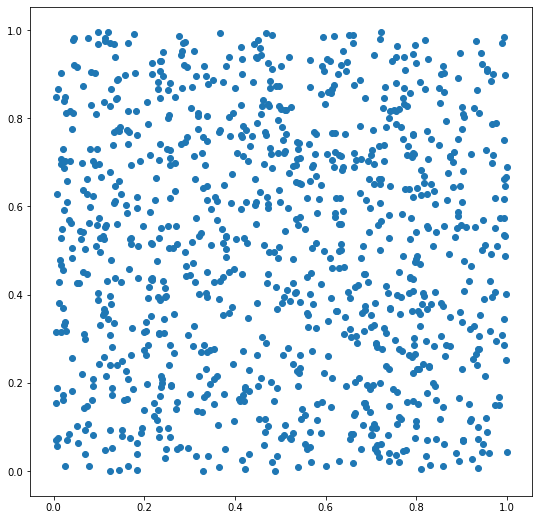

In [22]:
fig = plt.figure(figsize=(9,9))
plt.scatter(xs,ys)

### Creando las condiciones pedidas:

Vamos a determinar que dentro de la circunferencia (radio = 0.4):
   * Tiene una probabilidad de 0.1 de ser +1
Fuera de la circunferencia:
   * Tiene una probabilidad de 0.9 de ser +1

In [23]:
clases = [-1,1]
values = []

for i in range(1000):
    r_i = np.sqrt((xs[i]-0.5)**2+(ys[i]-0.5)**2)
    if(r_i <= 0.4):
        values.append(np.random.choice(clases,1,p=[0.9,0.1]))
    else:
        values.append(np.random.choice(clases,1,p=[0.1,0.9]))
        
values = np.array(values).flatten()

In [24]:
data = list(zip(xs,ys,values))
df = pd.DataFrame(data,columns=['xs','ys','c'])
df.iloc[15:20]

,xs,ys,c
15,0.457519,0.211079,1
16,0.081350,0.730412,1
17,0.315359,0.896762,1
18,0.116492,0.558538,-1
19,0.792497,0.407436,-1


In [25]:
X = df.iloc[:, :2].values 
y = df.iloc[:,2:].values
y = np.array(y).flatten()

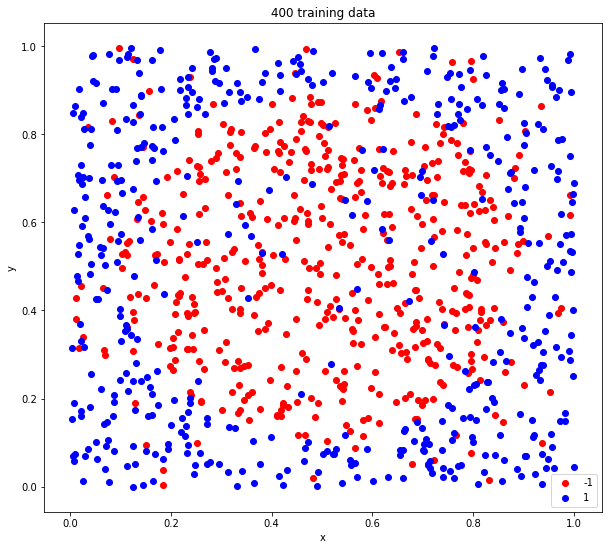

In [26]:
colors = ['red','blue']
names = ['-1', '1']

fig = plt.figure(figsize=(10,9))

for color, i, target in zip(colors, [-1, 1], names):
    plt.scatter(X[y==i, 0], X[y==i, 1], color=color, label=target)

plt.xlabel("x")
plt.ylabel("y")
plt.title("400 training data")
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.show()

###  Fit Algorithms

In [27]:
# One-nn
k = 1
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X,y)

# RandomForest
rf = RandomForestClassifier(n_estimators=500, random_state=17)
rf.fit(X,y)

# AdaBoost
ada = AdaBoostClassifier(DecisionTreeClassifier(max_depth=8),n_estimators=500, random_state=17)
ada.fit(X,y)

# Cart
cart = DecisionTreeClassifier(max_depth=8)
cart.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

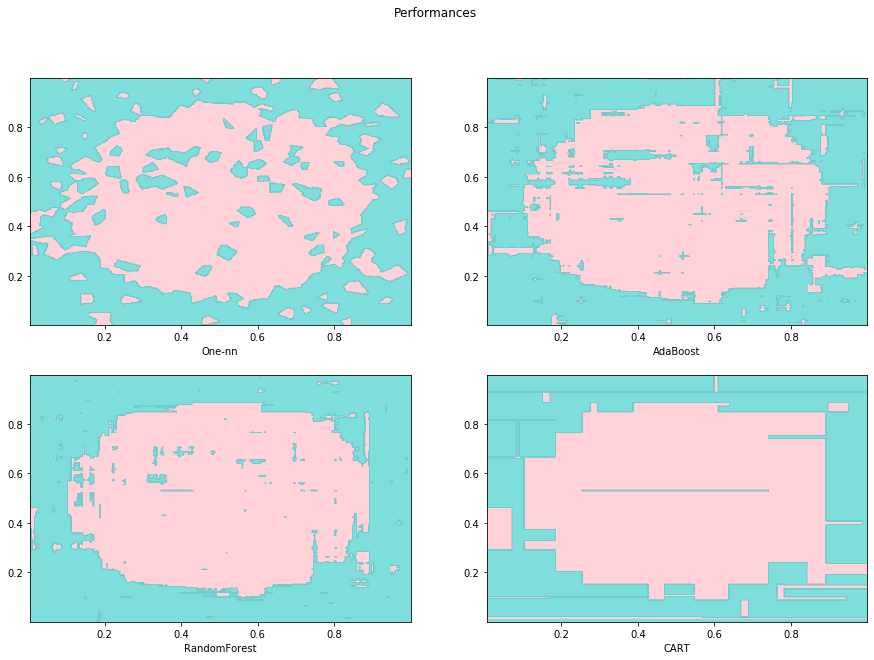

In [28]:
x_min, x_max = X[:,0].min() - 0.00001, X[:,0].max() + 0.001 
y_min, y_max = X[:,1].min() - 0.00001, X[:,1].max() + 0.001

h = (x_max/x_min)/100000

xx,yy = np.meshgrid(np.arange(x_min, x_max, h), 
                    np.arange(y_min, y_max, h))


# ======= Predictions =========
Z_knn = knn.predict(np.c_[xx.ravel(), yy.ravel()]) 
Z_knn = Z_knn.reshape(xx.shape)

Z_rf = rf.predict(np.c_[xx.ravel(), yy.ravel()]) 
Z_rf = Z_rf.reshape(xx.shape)

Z_ada = ada.predict(np.c_[xx.ravel(), yy.ravel()]) 
Z_ada = Z_ada.reshape(xx.shape)

Z_cart = cart.predict(np.c_[xx.ravel(), yy.ravel()]) 
Z_cart = Z_cart.reshape(xx.shape)

zs = [Z_knn,Z_ada,Z_rf,Z_cart]
names = ['One-nn','AdaBoost','RandomForest','CART']

# ======= Plot =========
fig,ax = plt.subplots(2,2,figsize=(15,10))
fig.suptitle('Performances')
for i in range(2):
    for j in range(2):
        ax[i,j].contourf(xx,yy,zs[i*2+j], alpha=0.7,colors=['pink','mediumturquoise'])
        ax[i,j].set_xlabel(names[i*2+j])


plt.show()

In [54]:
clases = [-1,1]
err_knn  = 0
err_ada  = 0
err_rf   = 0
err_cart = 0

for i in range(len(xx.ravel())):
    r_i = np.sqrt((xx.ravel()[i]-0.5)**2+(yy.ravel()[i]-0.5)**2)
    if(r_i <= 0.4): # dentro
        if(Z_knn.ravel()[i]==+1):  err_knn += 1
        if(Z_ada.ravel()[i]==+1):  err_ada += 1
        if(Z_rf.ravel()[i]==+1):   err_rf += 1
        if(Z_cart.ravel()[i]==+1): err_cart += 1
    else: # fuera
        if(Z_knn.ravel()[i]==-1):  err_knn += 1
        if(Z_ada.ravel()[i]==-1):  err_ada += 1
        if(Z_rf.ravel()[i]==-1):   err_rf += 1
        if(Z_cart.ravel()[i]==-1): err_cart += 1
        
print('Err Knn: '+str(err_knn/len(xx.ravel()))+'%')
print('Err AdaBoost: '+str(err_ada/len(xx.ravel()))+'%')
print('Err RandomForest: '+str(err_rf/len(xx.ravel()))+'%')
print('Err CART: '+str(err_cart/len(xx.ravel()))+'%')

Err Knn: 0.13521827344721513%
Err AdaBoost: 0.08591156863295092%
Err RandomForest: 0.05211167522182641%
Err CART: 0.10711714491412115%


### Comentarios/Conclusiones de la imagen

Sabemos por el paper que la regla de Bayes en esta configuración es solo etiquetar cada punto dentro del círculo y = +1 y cada punto fuera del círculo y = −1, lo que da una tasa de error de Bayes de 0.1.

Haremos de nuevo un cálculo del porcentaje de la region el cual es +1 fuera de la circunferencia y -1 dentro de la circunferencia. Lo contrario nos daría el error (dentro +1, fuera -1). Haciendo ésto se ve un mayor error del algoritmo KNN ($\approx$ 0.13) que los del algoritmo AdaBoost ($\approx$ 0.08) y RandomForests ($\approx$ 0.05). Esta tendencia tambien se nota en el paper donde el algoritmo KNN tiene el mayor porcentaje de error ($\approx$ 0.20) seguido del algoritmo CART ($\approx$ 0.18) y por último los algoritmos AdaBoost y RandomForest ($\approx$ 0.13)

Tenemos que aqui CART no funciona bien ya que se evidencia la forma casi cuadrada y no redonda de una circunferencia . Por otro lado tenemos que el algoritmo One-nn desnuda de nuevo su poca tolerancia a los ruidos ya que vemos dentro de la circunferencia muchas zonas de azul y afuera muchas zonas de rosado (llamadas islas en el paper). Finalmente se encuentra que AdaBoost y RandomForest se aseja más a una circunferencia con los ruidos bajos (como se vio en los problemas anteriores, el proceso de suavizado de púas reduce la influencia de los puntos de ruido) lo cual se ve la superioridad de éstos algoritmos frente al One-nn. 